# Examen d'ocvx 2

## Section 1

### question 1.

In [1]:
import warnings
import math
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class test_function():
    
    def __init__(self, name, value, dim, nb_params, convex=None, grad=None, hess=None, HCN=None):
        self.name = name
        self.value = value
        self.dim = dim
        self.nb_params = nb_params
        self.convex = convex
        self.grad = grad
        self.hess = hess
        self.HCN = HCN

In [3]:
mini_1_d = {
    "name": "mini_1",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True,
    "value" : (lambda x, gamma: gamma*(x**2) - x + 2),
    "grad"  : (lambda x, gamma: 2*gamma*x - 1),
    "hess"  : (lambda x, gamma: 2*gamma),
    "HCN"   : 1
}

mini_1 = test_function(**mini_1_d)

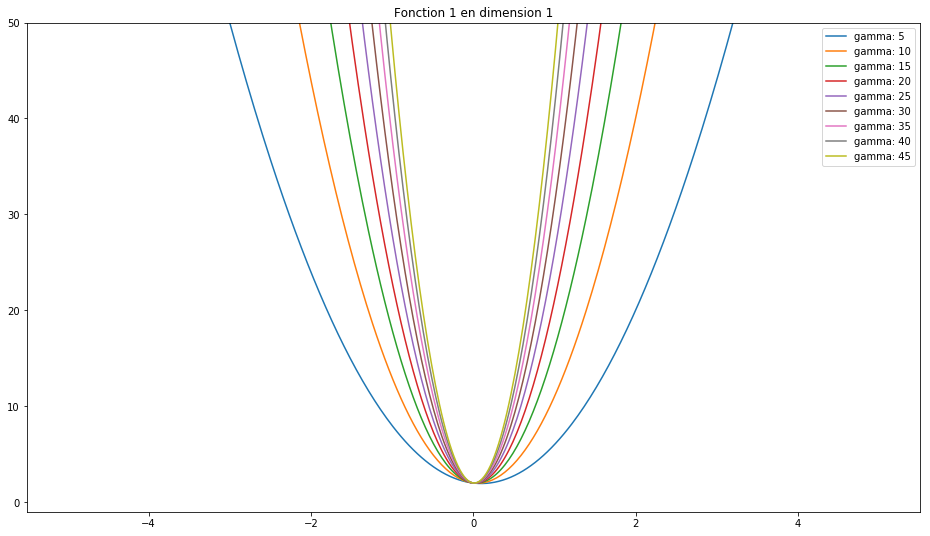

In [5]:
fig, ax = plt.subplots(figsize=(16, 9))
x = np.linspace(-5, 5, 400)
ax.set_ylim(-1, 50)
for gamma in range(5, 50, 5):
    ax.plot(x, mini_1.value(x, gamma), label="gamma: {}".format(gamma))
ax.set_title("Fonction 1 en dimension 1")
ax.legend()

In [12]:
maxi_1_d = {
    "name": "mini_1",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True,
    "value" : (lambda x, gamma: -1*gamma*(x**2) + x +1),
    "grad"  : (lambda x, gamma: -2*gamma*x + 1),
    "hess"  : (lambda x, gamma: -2*gamma),
    "HCN"   : 1
}

maxi_1 = test_function(**maxi_1_d)

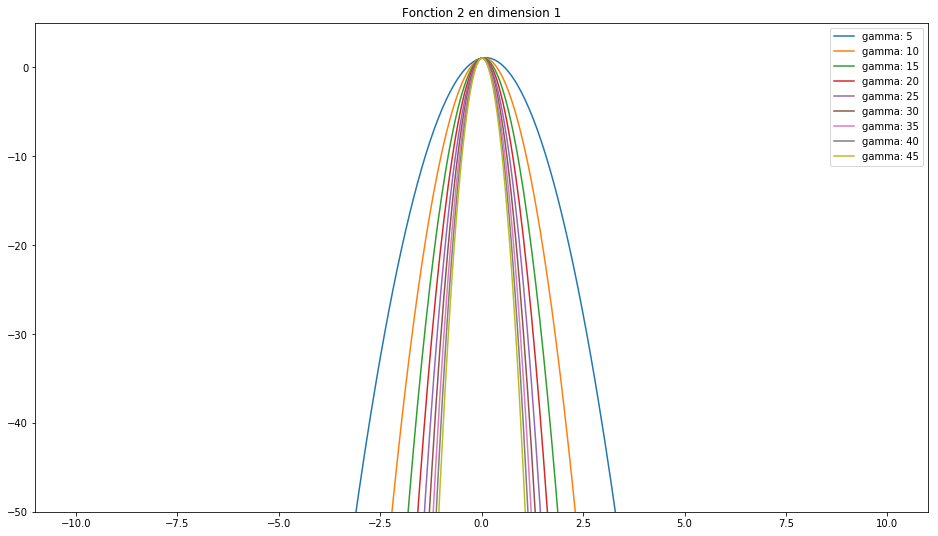

In [21]:
fig, ax = plt.subplots(figsize=(16, 9))
x = np.linspace(-10, 10, 400)
ax.set_ylim(-50, 5)
for gamma in range(5, 50, 5):
    ax.plot(x, maxi_1.value(x, gamma), label="gamma: {}".format(gamma))
ax.set_title("Fonction 2 en dimension 1")
ax.legend()

In [23]:
#C'est la fonction de Bashar, faut changer un peu

func_3_d = {
    "name": "function_3",
    "dim" : 2,
    "nb_params" : 1,
    "convex" : True ,
    "value" : (lambda x, gamma: x[:, 0]**2 + gamma*x[:, 1]**2),
    "grad"  : (lambda x, gamma: np.array([2*x[:, 0], 2*gamma*x[:, 1]]).reshape(1, -1)),
    "hess"  : (lambda x, gamma: np.diag([2, 2*gamma])),
    "HCN"   : (lambda x, gamma: gamma)
}

func_3 = test_function(**func_3_d)

In [24]:
func_3_d["grad"](np.array([[5, 5]]), 1)

array([[10, 10]])

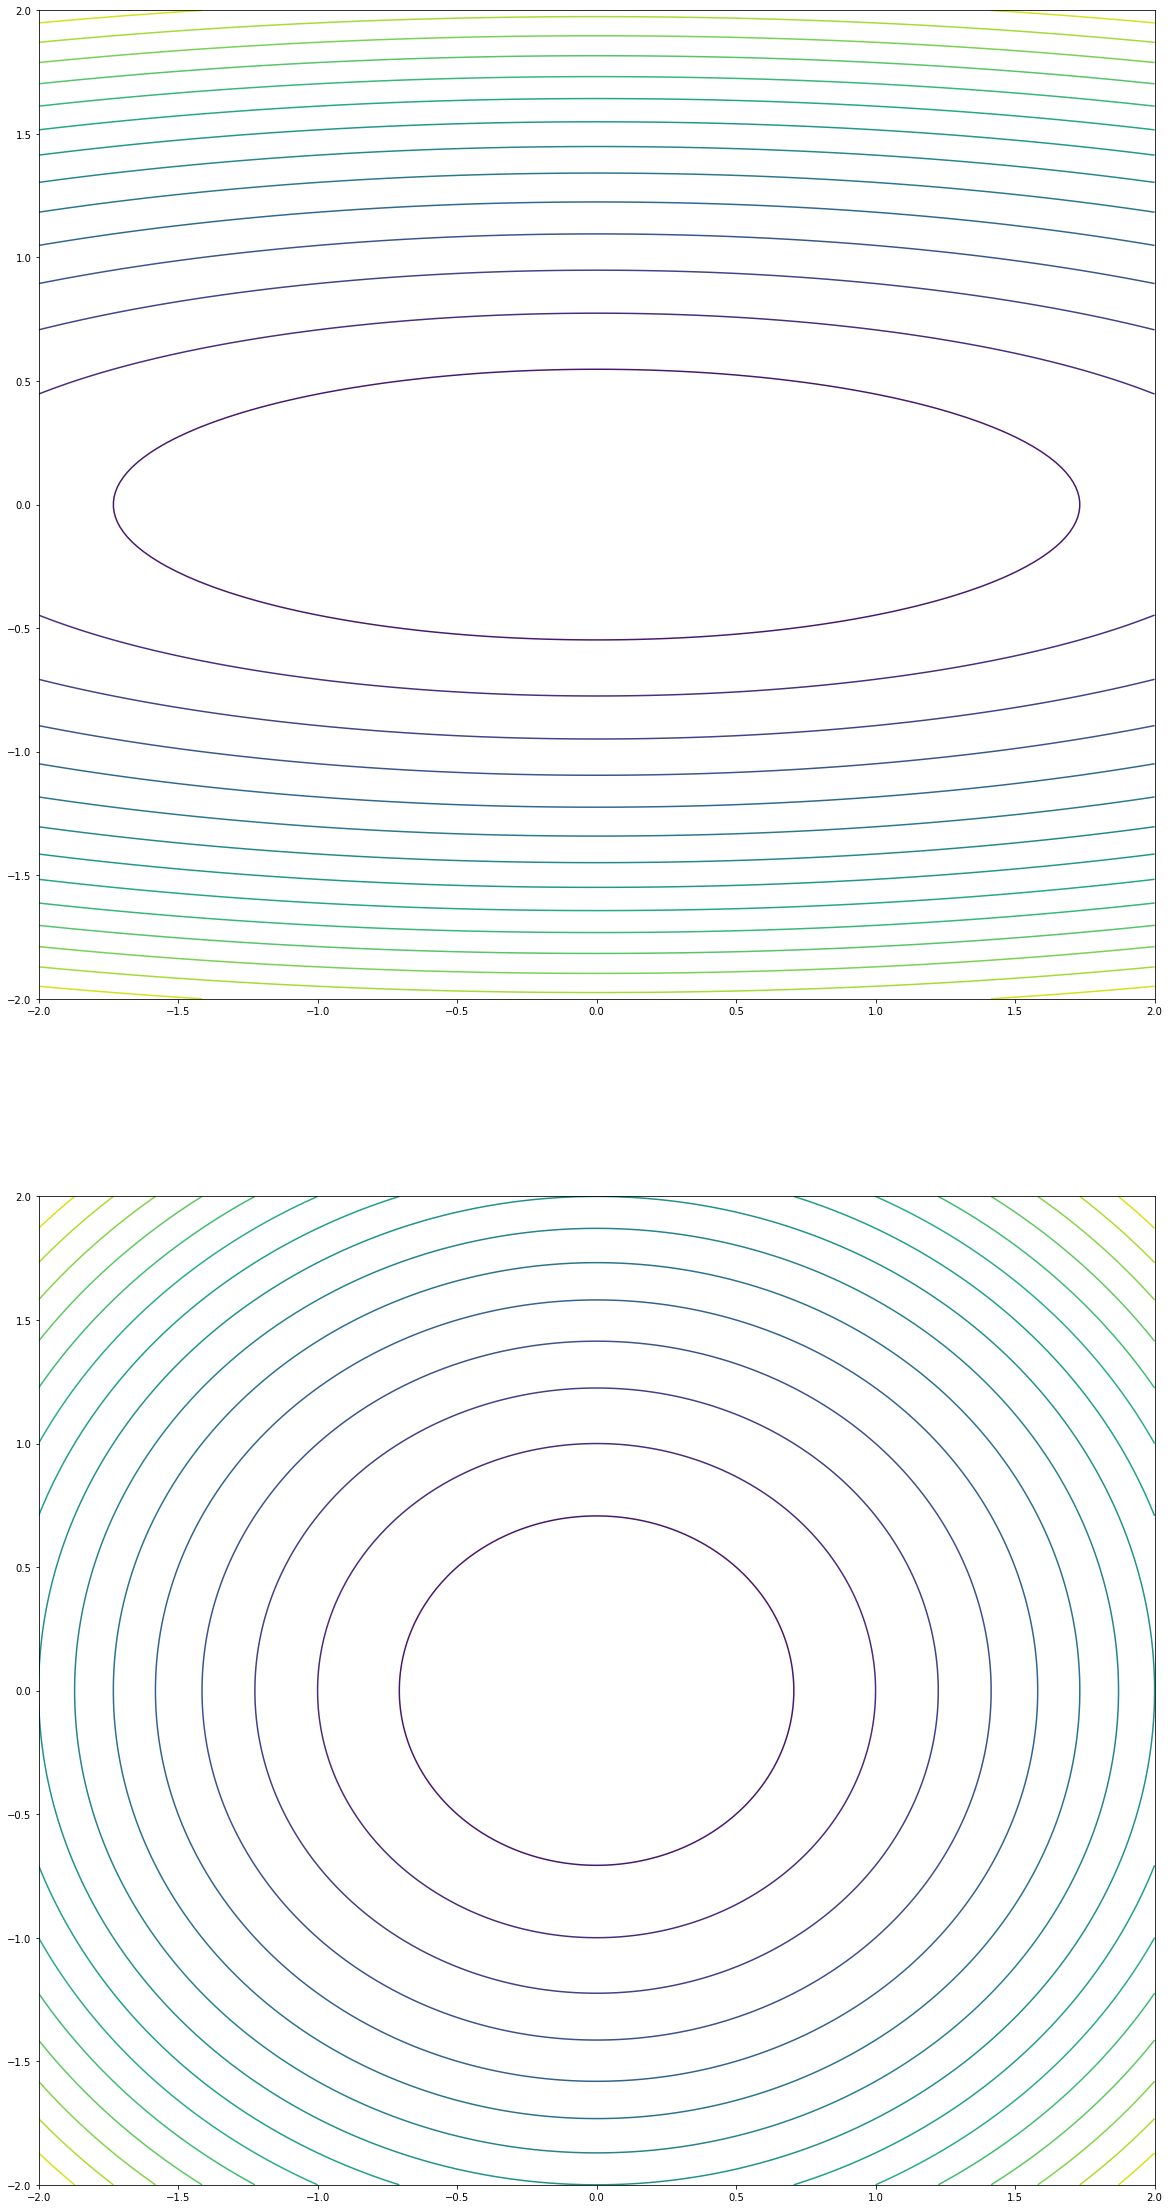

In [25]:
nb_pts, x_mi, x_ma, y_mi, y_ma = 200, -2, 2, -2, 2
fig, ax = plt.subplots(2, 1, figsize=(20, 40))
x, y = np.linspace(x_mi, x_ma, nb_pts), np.linspace(x_mi, x_ma, nb_pts)
X, Y = np.meshgrid(x, y)
## Reshaping X, Y for proper evaluation by input function
x_y = np.vstack([X.reshape(1, -1), Y.reshape(1, -1)]).reshape(1, 2, -1)
for i in [0, 1]:
    ax[i].set_xlim(x_mi, x_ma)
    ax[i].set_ylim(y_mi, y_ma)
ax[0].contour(X, Y, func_3.value(x_y, 10).reshape(nb_pts, -1), 15)
ax[1].contour(X, Y, func_3.value(x_y, 1).reshape(nb_pts, -1), 15)